![seaborn](https://d2h0cx97tjks2p.cloudfront.net/blogs/wp-content/uploads/sites/2/2018/07/seaborn.png) 
# The good, the bad, the seaborn


#### Whats wrong with this data visualization? (hint: so many things)

<img src="https://pbs.twimg.com/media/DNTFhGaXcAEbrMO.jpg" width=800>

Learning goals:
- Create a list of best practices for data visualization
- Identify the differences between matplotlib and seaborn
- Create a visualization with seaborn, applying best practices

## Goal 1: Create a list of best practices for data visualization

Documenting best practices:

In groups: [article 1](https://www.jackhagley.com/What-s-the-difference-between-an-Infographic-and-a-Data-Visualisation), [article 2](https://thoughtbot.com/blog/analyzing-minards-visualization-of-napoleons-1812-march), [article 3](http://dataremixed.com/2016/04/the-design-of-everyday-visualizations/), [article 4](https://visme.co/blog/data-storytelling-tips/),  article 5: Visualizations That Really Work.pdf (in folder), [article 6](https://www.tableau.com/learn/articles/best-beautiful-data-visualization-examples)

To fill in: [Best practices deck](https://docs.google.com/presentation/d/1SxjFajd97eMVUOm4k1yxoDC5f7UtBw_iodMfgqCYehg/edit#slide=id.g5b7079e757_0_0) 

## Goal 2:  Identify differences between seaborn & matplotlib


### Two code examples to accomplish the same plot:

**Resources:**
- [python graph gallery on seaborn](https://python-graph-gallery.com/seaborn/)
- [seaborn](https://seaborn.pydata.org/)


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

# Load in data
tips = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


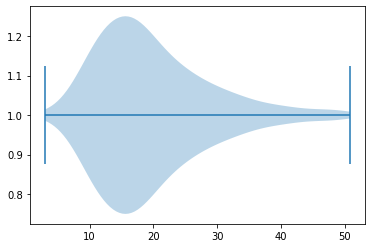

In [2]:
# Matplotlib:

# Initialize Figure and Axes object
fig, ax = plt.subplots()

# Create violinplot
ax.violinplot(tips["total_bill"], vert=False)

# Show the plot
plt.show()

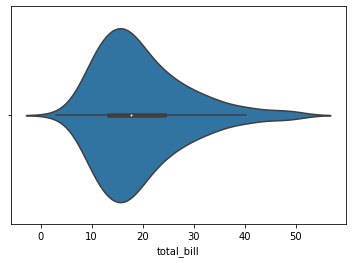

In [3]:
# Seaborn:

import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
tips = sns.load_dataset("tips")
# tips = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv")

# Create violinplot
# sns.violinplot(x = "total_bill", data=tips)
sns.violinplot(x = "total_bill", data=tips)

# Show the plot
plt.show()

### In depth comparison:

#### Groups 1:3

For each plot:
- How is the code to create it different from the maplotlib code?
- What are the customization options? 
- What are the top 3 most important customization options to know(with code) ?

Group 1 - [histograms](https://python-graph-gallery.com/histogram/)<br>
Group 2 - [scatter plot](https://python-graph-gallery.com/scatter-plot/)<br>
Group 3 - [boxplot](http://python-graph-gallery.com/boxplot/)<br>

#### Groups 4:5
- What new vocabulary was introduced in these posts?
- What is the benefit of these new options?
- What code/options do you need to know? 

Group 4 - [diverging, sequential, discrete color palattes](https://python-graph-gallery.com/101-make-a-color-palette-with-seaborn/)<br>
Group 5 - [seaborn themes](https://python-graph-gallery.com/104-seaborn-themes/) <br>

#### Group 6:
[seaborn themes w matplotlib](https://python-graph-gallery.com/106-seaborn-style-on-matplotlib-plot/)
How does this work?

_Time to work:_ 15 minutes <br>
_Time to discuss as large group:_ 10 minutes

## Goal 3: Create a visualization with seaborn, applying best practices

[exercise from data world](https://data.world/makeovermonday/2018w37-paying-the-president)


In [274]:
import numpy as np

In [275]:
import pandas as pd
df = pd.read_excel('https://query.data.world/s/5qxp2ldwsel3ow2pq5mkvfas2rfaup')

In [276]:
df.type.unique()

array(['FEC', 'government'], dtype=object)

In [277]:
df['category'] = df.type.apply(lambda x: 'Taxpayer Funds' if x == 'government' else 'Other Political Entities')
df.loc[df.source == 'Donald J. Trump for President, Inc.', 'category'] = 'Trump Campaign'

In [278]:
df.dropna(subset=['date'], axis=0, inplace=True)

In [279]:
df.date = pd.to_datetime(df.date)

In [280]:
df['month'] = df.date.dt.strftime('%Y-%m')
df.head()

,type,source,date,amount,purpose_scrubbed,property_scrubbed,purpose,property,city,state,category,month
0,FEC,"Donald J. Trump for President, Inc.",2016-04-01,9000.00,Rent,Trump Plaza LLC,RENT,TRUMP PLAZA LLC,New York,NY,Trump Campaign,2016-04
1,FEC,"Donald J. Trump for President, Inc.",2016-04-01,6000.00,Rent,Trump CPS LLC,RENT,TRUMP CPS LLC,New York,NY,Trump Campaign,2016-04
2,FEC,"Donald J. Trump for President, Inc.",2017-04-01,39816.67,Rent,Trump Tower Commercial LLC,RENT,TRUMP TOWER COMMERCIAL LLC,Hicksville,NY,Trump Campaign,2017-04
3,FEC,"Donald J. Trump for President, Inc.",2017-04-01,1000.00,Rent,Trump Restaurants LLC,RENT,TRUMP RESTAURANTS LLC,New York,NY,Trump Campaign,2017-04
4,government,Department of Defense,2017-04-10,1422.00,Lodging,Trump Hotel Panama,Hotels-Lodging,Trump International Hotel & Tower Panama,Panama City,Panama,Taxpayer Funds,2017-04


In [281]:
grouped = df[['category', 'month', 'amount']].groupby(['category', 'month']).sum()

In [282]:
group_df = grouped.reset_index()
# group_df.head()

In [283]:
month_df = pd.DataFrame(group_df.month.unique(), columns=['month'])
month_df.sort_values(by='month', inplace=True)
month_df.reset_index(inplace=True)
month_df.drop('index', axis=1, inplace=True)
# month_df

In [284]:
month_df.month = pd.to_datetime(month_df.month).dt.strftime('%b-%Y')
np.array(month_df.month)
# month_df

array(['Apr-2015', 'May-2015', 'Jun-2015', 'Jul-2015', 'Aug-2015',
       'Sep-2015', 'Oct-2015', 'Nov-2015', 'Dec-2015', 'Jan-2016',
       'Feb-2016', 'Mar-2016', 'Apr-2016', 'May-2016', 'Jun-2016',
       'Jul-2016', 'Aug-2016', 'Sep-2016', 'Oct-2016', 'Nov-2016',
       'Dec-2016', 'Jan-2017', 'Feb-2017', 'Mar-2017', 'Apr-2017',
       'May-2017', 'Jun-2017', 'Jul-2017', 'Aug-2017', 'Sep-2017',
       'Oct-2017', 'Nov-2017', 'Dec-2017', 'Jan-2018', 'Feb-2018',
       'Mar-2018', 'Apr-2018', 'May-2018'], dtype=object)

In [285]:
month_df.head()

,month
0,Apr-2015
1,May-2015
2,Jun-2015
3,Jul-2015
4,Aug-2015


In [286]:
Trump_df_small.head()

,category,month,amount
40,Trump Campaign,Apr-2015,1380.54
41,Trump Campaign,May-2015,9583.33
42,Trump Campaign,Jun-2015,558117.57
43,Trump Campaign,Jul-2015,67311.32
44,Trump Campaign,Aug-2015,496038.37


In [287]:
group_df.month = pd.to_datetime(group_df.month).dt.strftime('%b-%Y')

In [288]:
Trump_df_small = group_df.loc[group_df['category'] == 'Trump Campaign']
Political_df_small = group_df.loc[group_df['category'] == 'Other Political Entities']
Taxpayer_df_small = group_df.loc[group_df['category'] == 'Taxpayer Funds']

In [289]:
Trump_df = month_df.merge(Trump_df_small, how='left', left_on='month', right_on='month')
Political_df = month_df.merge(Political_df_small, how='left', left_on='month', right_on='month')
Taxpayer_df = month_df.merge(Taxpayer_df_small, how='left', left_on='month', right_on='month')

In [290]:
Trump_df.category.fillna(value='Trump Campaign', inplace=True)
Political_df.category.fillna(value='Other Political Entities', inplace=True)
Taxpayer_df.category.fillna(value='Taxpayer Funds', inplace=True)
Trump_df.amount.fillna(value=0, inplace=True)
Political_df.amount.fillna(value=0, inplace=True)
Taxpayer_df.amount.fillna(value=0, inplace=True)

In [297]:
Trump_df.head()

,month,category,amount
0,Apr-2015,Trump Campaign,1380.54
1,May-2015,Trump Campaign,9583.33
2,Jun-2015,Trump Campaign,558117.57
3,Jul-2015,Trump Campaign,67311.32
4,Aug-2015,Trump Campaign,496038.37


In [296]:
Political_df.head()

,month,category,amount
0,Apr-2015,Other Political Entities,0.00
1,May-2015,Other Political Entities,1303.46
2,Jun-2015,Other Political Entities,0.00
3,Jul-2015,Other Political Entities,0.00
4,Aug-2015,Other Political Entities,0.00


In [293]:
Taxpayer_df.head()

,month,category,amount
0,Apr-2015,Taxpayer Funds,0.0
1,May-2015,Taxpayer Funds,0.0
2,Jun-2015,Taxpayer Funds,0.0
3,Jul-2015,Taxpayer Funds,0.0
4,Aug-2015,Taxpayer Funds,0.0


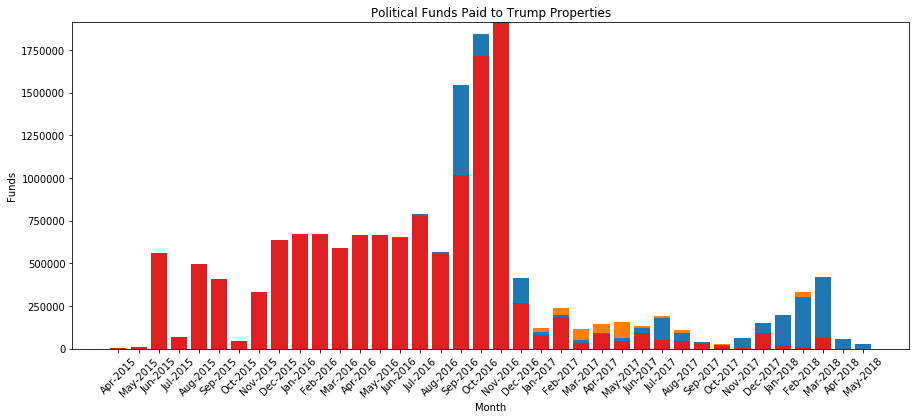

In [305]:
plt.figure(figsize=(15,6))
trump_bar = sns.barplot(data=Trump_df, x='month', y='amount', color='red')
trump_bar.set(xlabel='Month', ylabel='Funds', title='Political Funds Paid to Trump Properties')
trump_bar.set_xticklabels(trump_bar.get_xticklabels(), rotation=45)

# trump_bar = sns.barplot(data=Trump_df, x='month', y='amount', bottom=pol_bar)
# tax_bar = sns.barplot(data=Taxpayer_df, x='month', y='amount', bottom=trump_bar)

pol_bar = plt.bar(Political_df['month'],
                    Political_df['amount'],
                    bottom=Trump_df['amount'])
tax_bar = plt.bar(Taxpayer_df['month'],
                  Taxpayer_df['amount'],
                  bottom=(Political_df['amount']+Trump_df['amount']))

plt.show()

## Reflection:

- What worked from this training? 
- What can you apply moving forward?
- What's one concept you would like to practice more?

#### For extra fun:
[visualization challenges](http://www.storytellingwithdata.com/blog/2019/3/1/swdchallenge-visualize-this-data)

[seaborn cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf)